In [1]:
# Project name: Majors analysis
# Author: Wenting Wang
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
#Importing a CSV file
major=pd.read_csv('majors.csv')
major

,Major ID,Major Name,TOTAL DEGREES AWARDED IN 2016,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Average WAGE,Women in Workforce(Million),Men in Workforce(Million),Average Employee Age
0,1,Computer Science,35329,6872,34766,92592,0.31,1.85,37.3
1,2,Electrical Engineering,33127,8120,43250,106939,0.14,4.09,43.5
2,3,Mechanical Engineering,39294,8091,43220,106939,0.65,4.05,43.5
3,4,Chemical Engineering,12633,9168,46720,36939,0.87,4.19,36.5
4,5,Industrial Engineering,18423,8715,45445,82939,0.45,3.51,40.5
5,6,Information Technology,20864,5472,29150,62592,0.38,1.85,35.3
6,7,Civil Engineering,20372,8052,44913,61500,0.89,4.09,43.5
7,8,Statistics,16611,8749,46022,50635,1.05,2.31,44.9
8,9,Nursing,21673,8317,34664,65002,6.54,0.58,32.2
9,10,Management Information Systems,15126,6732,29420,45676,0.85,2.50,35.6


In [2]:
major_cleaned = major.fillna({'TOTAL DEGREES AWARDED IN 2016':0,'Median in-state Public Tuition':0,'Median out-of-state Private Tuition':0,'Average WAGE':0,'People in Workforce(Million)':0,'Average Employee Age':0}) 
print(major_cleaned)

    Major ID                                         Major Name  \
0          1                                   Computer Science   
1          2                             Electrical Engineering   
2          3                             Mechanical Engineering   
3          4                               Chemical Engineering   
4          5                             Industrial Engineering   
5          6                             Information Technology   
6          7                                  Civil Engineering   
7          8                                         Statistics   
8          9                                            Nursing   
9         10                     Management Information Systems   
10        11                                            Finance   
11        12                                        Mathematics   
12        13                             Biomedical Engineering   
13        14                                         Accountin

In [3]:
major_cleaned.describe()

,Major ID,TOTAL DEGREES AWARDED IN 2016,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Average WAGE,Women in Workforce(Million),Men in Workforce(Million),Average Employee Age
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000
mean,25.50000,46845.620000,7430.520000,34970.78000,129035.520000,3.076200,1.535000,39.13800
std,14.57738,68345.017879,927.706658,6130.53615,160283.645143,2.075627,1.166191,5.81135
min,1.00000,9554.000000,5472.000000,27040.00000,31387.000000,0.140000,0.130000,29.60000
25%,13.25000,13922.250000,6846.000000,29653.00000,41476.750000,0.912500,0.632500,34.75000
50%,25.50000,20525.500000,7116.000000,33515.00000,62428.500000,3.135000,1.090000,38.35000
75%,37.75000,41933.250000,8081.250000,37907.50000,124215.250000,4.340000,1.850000,43.50000
max,50.00000,319647.000000,9912.000000,46720.00000,630491.000000,6.840000,4.190000,51.60000


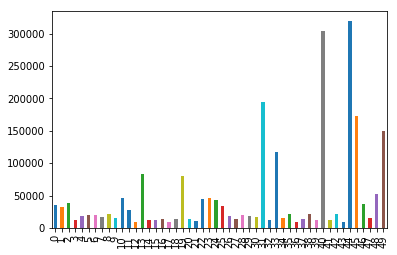

In [4]:
import matplotlib.pyplot as plt
major_cleaned['TOTAL DEGREES AWARDED IN 2016'].plot.bar()

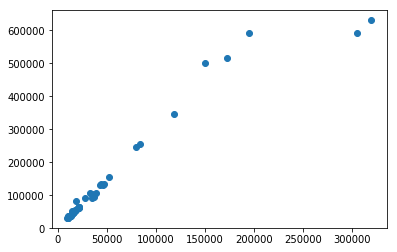

In [5]:
x = major_cleaned['TOTAL DEGREES AWARDED IN 2016']
y = major_cleaned['Average WAGE']
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x[:,np.newaxis],y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

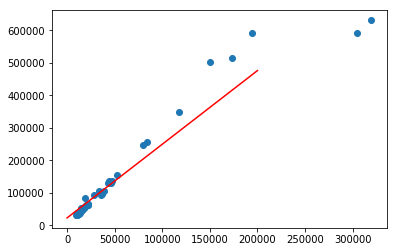

In [7]:
xfit = np.linspace(0,200000,100)
yfit = linear_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit,color='red')

In [8]:
slope = linear_model.coef_[0] 
interception = linear_model.intercept_
print('Slope: ',slope,' y-intercept: ',interception)

Slope:  2.2642689416403545  y-intercept:  22964.43758211378


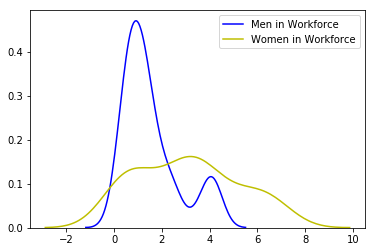

In [9]:
import seaborn as sns
ax1 = sns.kdeplot(major_cleaned['Men in Workforce(Million)'], color='b', label = "Men in Workforce")
ax2 = sns.kdeplot(major_cleaned['Women in Workforce(Million)'], color='y', label = "Women in Workforce")

In [10]:
#Getting the average wage of all majors in Ascending order.
major_cleaned = major_cleaned.set_index('Average WAGE')
major_cleaned.sort_index()

,Major ID,Major Name,TOTAL DEGREES AWARDED IN 2016,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Women in Workforce(Million),Men in Workforce(Million),Average Employee Age
Average WAGE,,,,,,,,
31387,37,Sports Studies,10054,9912,27040,0.41,0.56,31.3
31861,44,Biochemistry,9554,7585,36625,2.67,0.49,34.6
32255,18,Architecture,10082,8203,44976,0.21,1.36,38.5
32324,22,Graphic Design,10380,6470,29498,3.51,0.64,29.6
36324,40,Music Management,12030,6752,29492,2.60,0.52,37.6
36421,42,Anthropology,12189,7234,45592,3.69,0.63,47.9
36939,4,Chemical Engineering,12633,9168,46720,0.87,4.19,36.5
36939,13,Biomedical Engineering,10093,9322,46655,0.98,4.09,34.5
37265,28,Journalism,13858,7128,30827,3.87,1.09,34.0


In [11]:
#Getting the number of women in workforce of all majors in Ascending order.
major_cleaned = major_cleaned.set_index('Women in Workforce(Million)')
major_cleaned.sort_index()

,Major ID,Major Name,TOTAL DEGREES AWARDED IN 2016,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Women in Workforce(Million),Average Employee Age
Men in Workforce(Million),,,,,,,
0.13,15,Developmental Economics & International Develo...,12713,9273,41800,0.58,42.9
0.33,30,Philosophy,18639,7238,37020,2.31,51.6
0.34,31,Environmental Science,17808,7043,34100,1.61,43.8
0.45,33,Spanish Language & Literature,12388,6905,34766,4.65,34.3
0.49,44,Biochemistry,9554,7585,36625,2.67,34.6
0.51,19,Fashion & Apparel Design,14115,8768,32246,3.15,30.6
0.52,40,Music Management,12030,6752,29492,2.60,37.6
0.56,37,Sports Studies,10054,9912,27040,0.41,31.3
0.58,9,Nursing,21673,8317,34664,6.54,32.2


In [12]:
#Getting the number of men in workforce of all majors in Ascending order.
major_cleaned = major_cleaned.set_index('Women in Workforce(Million)')
major_cleaned.sort_index()

,Major ID,Major Name,TOTAL DEGREES AWARDED IN 2016,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Average Employee Age
Women in Workforce(Million),,,,,,
0.14,2,Electrical Engineering,33127,8120,43250,43.5
0.21,18,Architecture,10082,8203,44976,38.5
0.31,1,Computer Science,35329,6872,34766,37.3
0.32,12,Mathematics,28075,6846,33282,40.9
0.38,6,Information Technology,20864,5472,29150,35.3
0.41,37,Sports Studies,10054,9912,27040,31.3
0.45,5,Industrial Engineering,18423,8715,45445,40.5
0.58,15,Developmental Economics & International Develo...,12713,9273,41800,42.9
0.65,3,Mechanical Engineering,39294,8091,43220,43.5


In [13]:
#Setting 'TOTAL DEGREES AWARDED IN 2016' as a new index.
major_cleaned = major_cleaned.set_index('TOTAL DEGREES AWARDED IN 2016')
major_cleaned.sort_index()

,Major ID,Major Name,Median in-state Public Tuition ($),Median out-of-state Private Tuition ($),Average Employee Age
TOTAL DEGREES AWARDED IN 2016,,,,,
9554,44,Biochemistry,7585,36625,34.6
10054,37,Sports Studies,9912,27040,31.3
10082,18,Architecture,8203,44976,38.5
10093,13,Biomedical Engineering,9322,46655,34.5
10380,22,Graphic Design,6470,29498,29.6
12030,40,Music Management,6752,29492,37.6
12189,42,Anthropology,7234,45592,47.9
12388,33,Spanish Language & Literature,6905,34766,34.3
12547,16,Physics,7238,40535,35.3
